# Random Forest Classification- Regression

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split                                                    #distributing data
from sklearn.ensemble import RandomForestRegressor                                                     #model used   
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score #Accuracy check 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df= pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

     Sales -- Unit sales (in thousands) at each location
     Competitor Price -- Price charged by competitor at each location
     Income -- Community income level (in thousands of dollars)
     Advertising -- Local advertising budget for company at each location (in thousands of dollars)
     Population -- Population size in region (in thousands)
     Price -- Price company charges for car seats at each site
     Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
     Age -- Average age of the local population
     Education -- Education level at each location
     Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
     US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [5]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [6]:
df.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df.US.unique()

array(['Yes', 'No'], dtype=object)

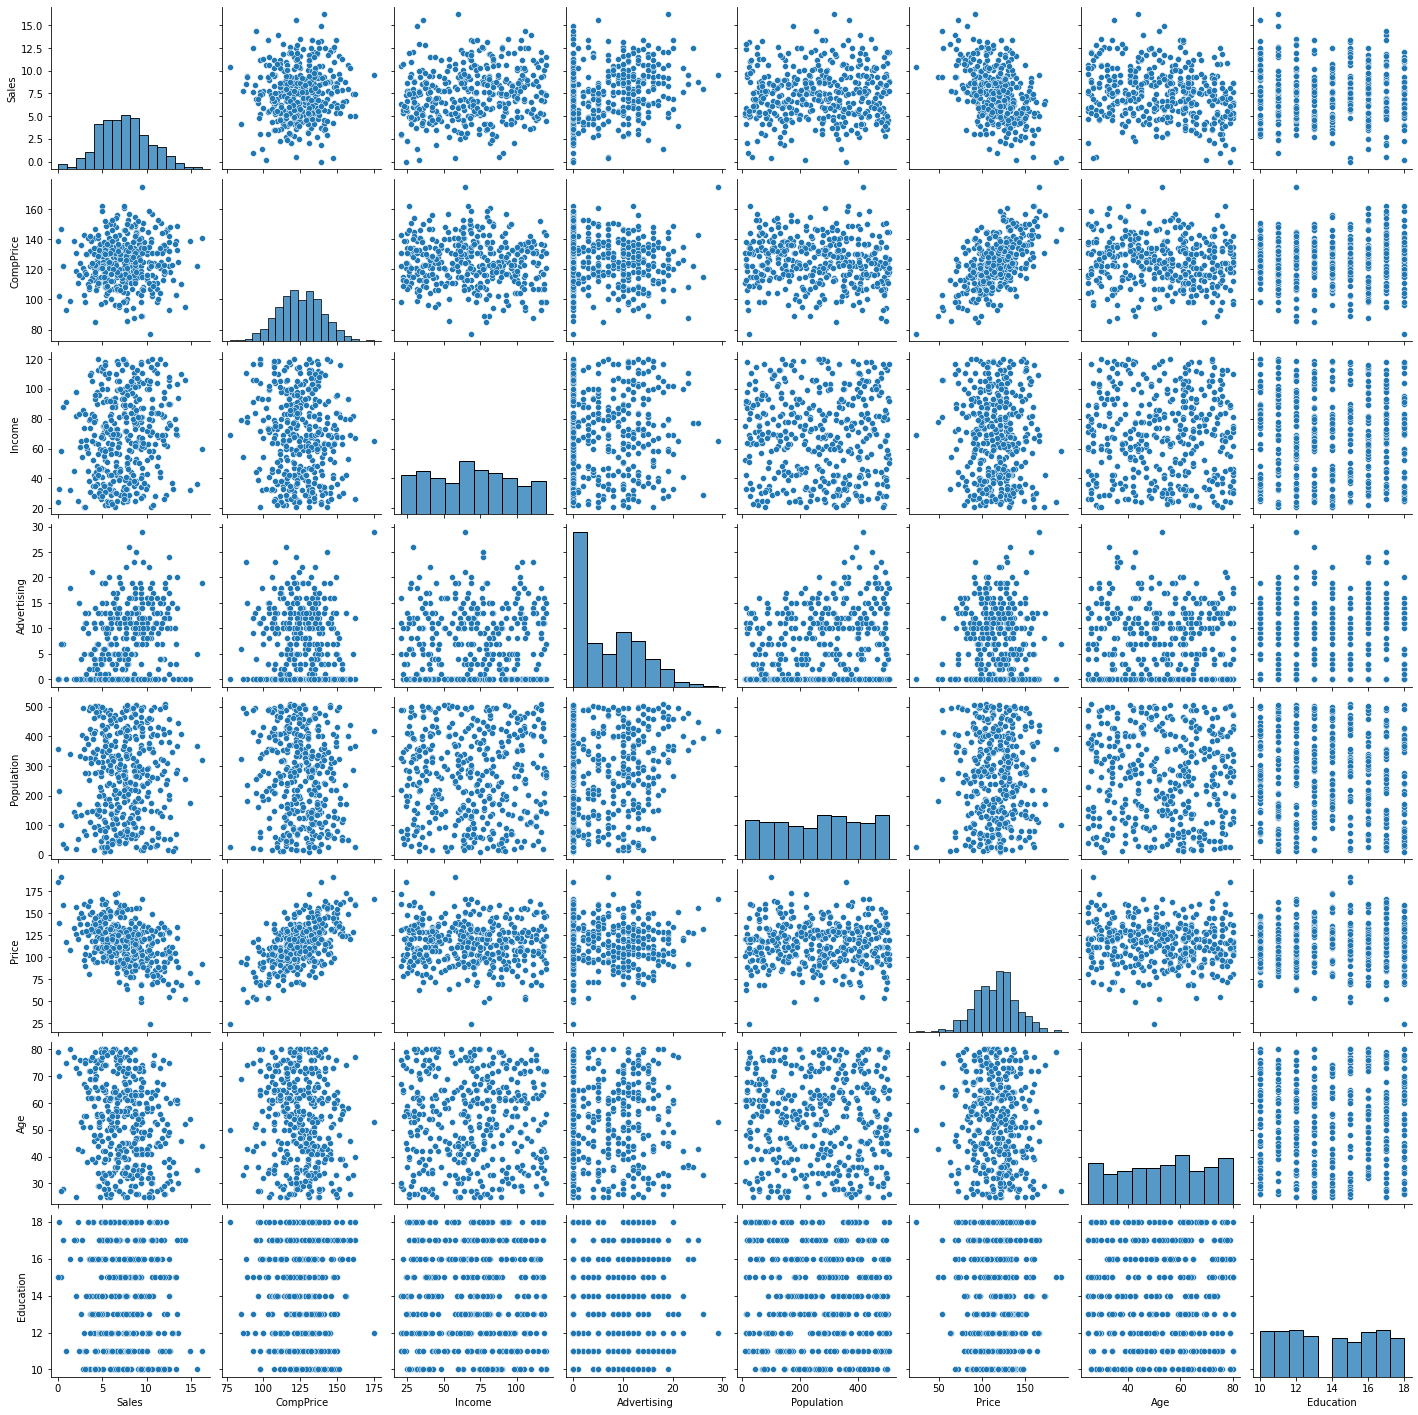

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='CompPrice', ylabel='Price'>

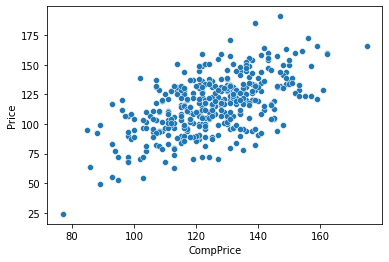

In [9]:
sns.scatterplot(x='CompPrice',y='Price',data=df)

<AxesSubplot:>

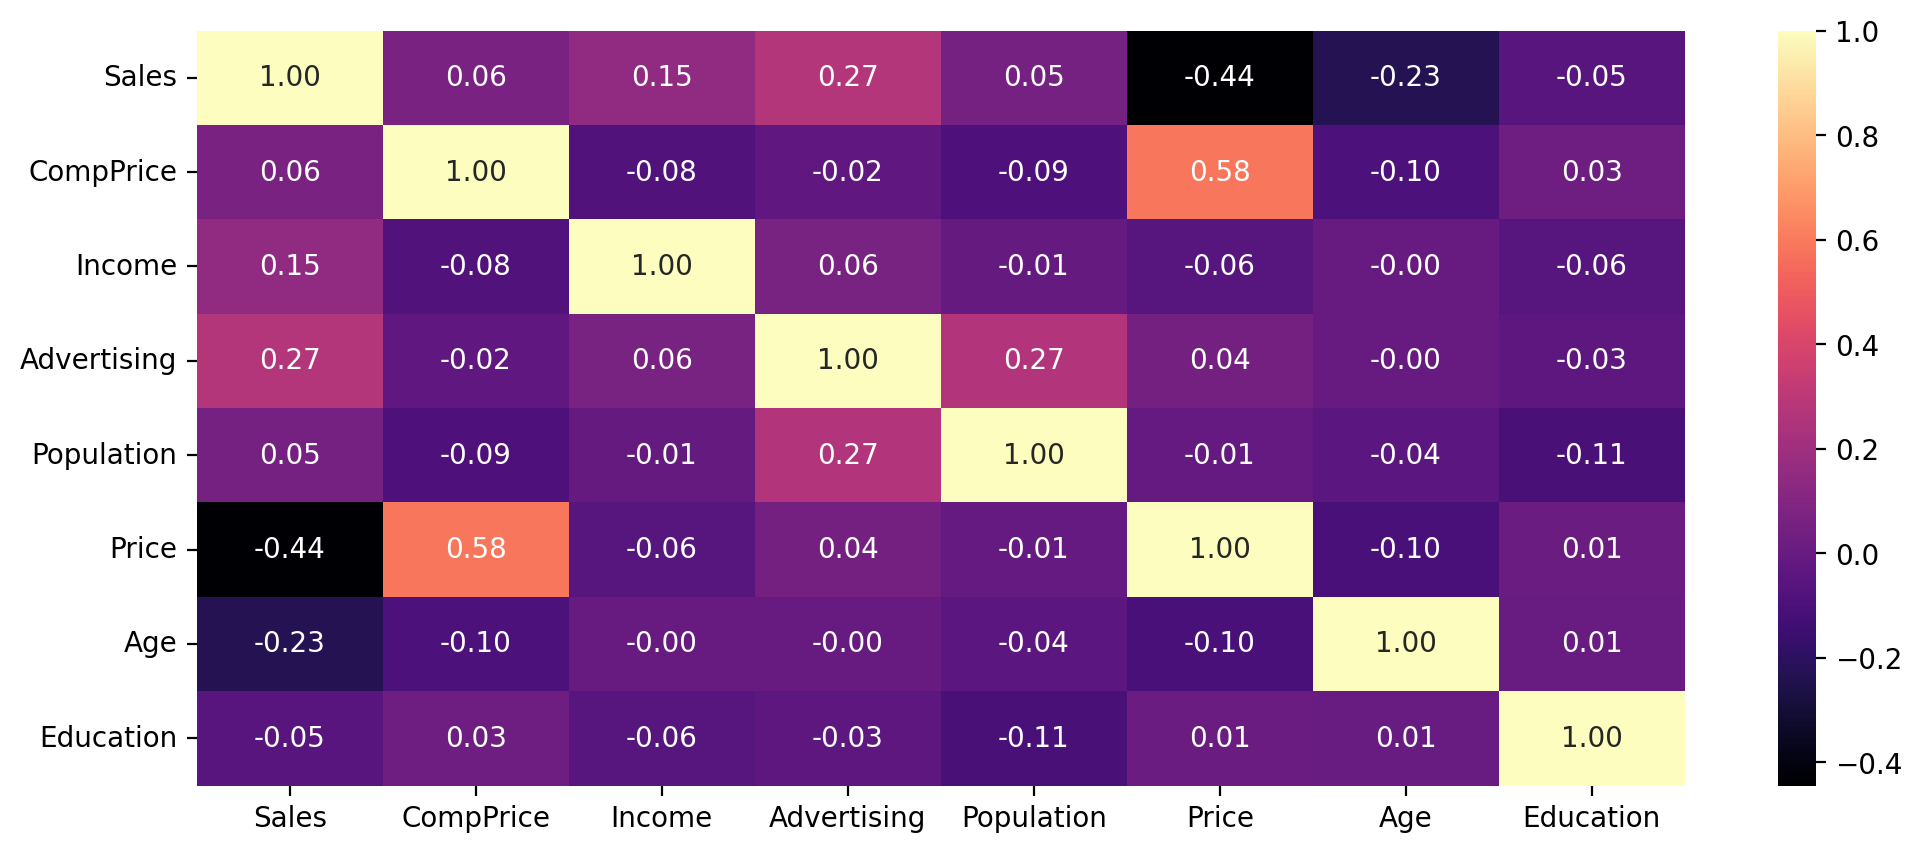

In [10]:
corre= df.corr()
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(corre,annot=True,fmt='.2f',cmap='magma')

In [11]:
shelf_loc= {'Bad':1,'Good':2,'Medium':3}
df['ShelveLoc']=df.ShelveLoc.map(shelf_loc)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes
2,10.06,113,35,10,269,80,3,59,12,Yes,Yes
3,7.40,117,100,4,466,97,3,55,14,Yes,Yes
4,4.15,141,64,3,340,128,1,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,Yes,Yes
396,6.14,139,23,3,37,120,3,55,11,No,Yes
397,7.41,162,26,12,368,159,3,40,18,Yes,Yes
398,5.94,100,79,7,284,95,1,50,12,Yes,Yes


# Train | Test Split

In [12]:
X= pd.get_dummies(df.drop('Sales',axis=1),drop_first=True)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,0,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [13]:
y= df.Sales
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Random Forest Classification- Regression

In [15]:
model= RandomForestRegressor(n_estimators=100,bootstrap=True,oob_score=True)

In [16]:
model.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [17]:
y_pred=model.predict(X_test)

In [24]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Rmse: {rmse}')

Rmse: 1.4361391993814525


In [28]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results=cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6077569610440492


In [29]:
model.oob_score_

0.6422627603242622

In [30]:
pd.DataFrame(index=X_train.columns, data=model.feature_importances_,columns=['Feature Importance'] ).sort_values(by='Feature Importance')

,Feature Importance
Urban_Yes,0.005818
US_Yes,0.005946
Education,0.035367
Population,0.039531
Income,0.063726
Advertising,0.077714
CompPrice,0.112148
Age,0.131628
ShelveLoc,0.230348
Price,0.297775


# Bagged Decision Trees for Regression

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean()) 

0.5911922028652119


# Random Forest Regression with kfold

In [33]:
num_trees = 100
max_features = 10
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean()) 

0.6057561243203683


# AdaBoost Regression

In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
num_trees = 200
seed=7
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6224867962104523


In [36]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 1.242941582678724


In [39]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 1.5934632983954584
RMSE : 1.4294122374831788
RMSE : 1.4010784706789263


In [40]:
from sklearn.model_selection import GridSearchCV
random_forest_tuning = RandomForestRegressor(random_state = 7)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [41]:
y_pred=GSCV.predict(X_test)

In [42]:
mean_absolute_error(y_test,y_pred)

1.1274784521401349

# Random forest Classifier

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
n_estimators=[10,15,64,100,128,200]
bootstrap = [True,False]
oob_score = [True,False]

In [45]:
param_grid= {'n_estimators':n_estimators,'bootstrap':bootstrap,'oob_score':oob_score}

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
grid= GridSearchCV(rfr,param_grid=param_grid)

In [47]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 15, 64, 100, 128, 200],
                         'oob_score': [True, False]})

In [48]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 100, 'oob_score': True}

In [49]:
pred= grid.predict(X_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'RMSE : {rmse}')

RMSE : 1.4266146235932111
